In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:

import warnings
warnings.filterwarnings('ignore')

In [3]:
import math

def normal_round(n_ar, decimals=0):
    out = []
    for n in n_ar:
        expoN = n * 10 ** decimals
        if abs(abs(expoN) - abs(math.floor(expoN))) < 0.5:
            out.append(math.floor(expoN) / 10 ** decimals)
        else:
            out.append(math.ceil(expoN) / 10 ** decimals)
    return out

In [23]:
file_s = '/Users/olyaskulovich/full_struct_July_only_sm.pkl'# smos1020_out_short_2010_2020_may_for_HOVEMOLLER.pkl' #data_unc_2010_2020_SHORT_may2022.pkl'#test_may_2010-2020_6.pkl' #full_outJan16.pkl'
db = pd.read_pickle(file_s)
db.head()

,lat,lon,date,str_mean
0,-55.177,-69.899,2002-06-19,0.292888
1,47.394,-82.349,2002-06-19,0.536642
2,-24.346,-60.562,2002-06-19,0.473172
3,47.394,-82.089,2002-06-19,0.541695
4,47.394,-81.830,2002-06-19,0.544478


In [19]:
db = db.sort_values(by='date')

print(db.head())
db.tail()

          lat      lon       date  str_mean
0     -23.703  123.329 2010-01-17  0.043202
41300 -32.121  -58.746 2010-01-17  0.276836
41301  -7.772   32.810 2010-01-17  0.384836
41302  19.283  -98.429 2010-01-17  0.241555
41303 -37.352  -73.271 2010-01-17  0.544061


,lat,lon,date,str_mean
21221663,0.490,-72.493,2011-10-03,0.433102
21221662,0.490,-72.752,2011-10-03,0.443925
21221661,0.490,-73.271,2011-10-03,0.390123
21221659,0.490,-73.790,2011-10-03,0.429131
21278047,-21.161,130.331,2011-10-03,0.077876


In [33]:
dates =np.unique(db['date'])
dates1 = [pd.Timestamp(x).date() for x in dates]

In [34]:
dates

array(['2002-06-19T00:00:00.000000000', '2002-06-22T00:00:00.000000000',
       '2002-06-25T00:00:00.000000000', ...,
       '2020-08-25T00:00:00.000000000', '2020-08-28T00:00:00.000000000',
       '2020-08-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
print(db.shape)
db = db.dropna()
print(db.shape)

#np.mean(db['str_mean'])

#db = db[db['date']>sm3].copy()

(346446311, 4)
(286198611, 4)


In [35]:
#import sys
#!{sys.executable} -m pip install ismn
from ismn.interface import ISMN_Interface


# Either a .zip file or one folder that contains all networks, here we read from .zip
data_path = "/Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/InsituSM/Data_separate_files_20020101_20200901_7160_LiOc_20210920"
#data_path = "/Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/InsituSM/Data_separate_files_header_20020619_20200901_7160_yIrm_20210928.zip"


ismn_data = ISMN_Interface(data_path)

Found existing ismn metadata in /Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/InsituSM/Data_separate_files_20020101_20200901_7160_LiOc_20210920/python_metadata/Data_separate_files_20020101_20200901_7160_LiOc_20210920.csv.


In [25]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [9]:
metadata_table = ismn_data.metadata

In [10]:
sm2 = pd.to_datetime('2010-01-17', format='%Y-%m-%d')
    
sm3 = pd.to_datetime('2015-03-31', format='%Y-%m-%d')


low correlation
Sensors at 'Morris': ['Water-Matric-Potential-Sensor-229L-E_soil_temperature_0.350000_0.350000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_0.600000_0.600000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_1.750000_1.750000', 'Water-Matric-Potential-Sensor-229L-E_soil_moisture_0.050000_0.050000', 'Water-Matric-Potential-Sensor-229L-E_soil_moisture_1.250000_1.250000', 'Water-Matric-Potential-Sensor-229L-E_soil_moisture_0.350000_0.350000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_0.850000_0.850000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_1.250000_1.250000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_0.250000_0.250000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_0.150000_0.150000', 'Water-Matric-Potential-Sensor-229L-E_soil_temperature_0.050000_0.050000', 'Water-Matric-Potential-Sensor-229L-E_soil_moisture_0.250000_0.250000', 'Water-Matric-Potential-Sensor-229L-E_soil_moisture_0.150000_0.150000', 'W

low correlation
Sensors at 'OWENSGORGE': ['GPS_snow_depth_0.000000_0.000000', 'GPS_soil_moisture_0.000000_0.050000']
Stations in 'PBO_H2O': ['AKRONARPT', 'ALKALILAKE', 'ANGELFIRE', 'ANGUS_PROP', 'ANTIMONYFL', 'ARKANSACRK', 'ARMINGTON', 'ATOMICCITY', 'AUBREYPEAK', 'AVILARANCH', 'BAKERCITY', 'BANDONARPT', 'BILLINGSAP', 'BIRCHIMCYN', 'BITTERWATR', 'BKAP_SCGN', 'BLACKROCK', 'BLINDSPRIN', 'BROTHERSDT', 'BUCKLEYFLT', 'BUCKSKINMT', 'BUTTERBRED', 'BUZZARDRST', 'Bethlehem', 'CABOROJO', 'CALAVERAS', 'CALCITYAPT', 'CALCITYPLR', 'CALIVALLEY', 'CAMPELLIOT', 'CARRIZORAN', 'CERREJON', 'CERRILLOS', 'CHILEOFLAT', 'CLAYTONARP', 'CN02', 'CN07', 'COXCOMBMTN', 'CRRS_SCGN', 'CSCI_SCGN', 'CTDM_SCGN', 'DELANO_AIR', 'DELTAMUNI', 'DELVALLE', 'DRI_RENO', 'DRYMOUNTAI', 'DUECECLUBS', 'ENNISFISH', 'EcRockStPkTX2012', 'FALLBROOK', 'FGST_SCGN', 'FORDRA087G', 'FOUNTGREEN', 'FREEMONTAP', 'GLRS_SCGN', 'GNPS_SCGN', 'GRANITEMTN', 'GRANITEPK', 'GRANTS', 'GRAPEVINE', 'HARTMTNNWR', 'HAYSPEAK', 'HILL72', 'HILLMRANCHM', 'HLFIS

KeyboardInterrupt: 

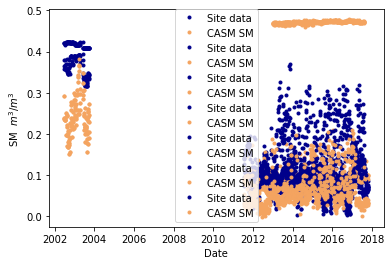

In [46]:
count = 0
flag = 0
col_name = 'str_mean'
output_df = pd.DataFrame({'lat': [], 'lon': [], 'climate': [], 'cor': [], 'cor': [], 'R2': [], 'rmse':[], 'sample': [], 'station':[], 'network':[], 'sensor':[]} )
for network, station, sensor in ismn_data.collection.iter_sensors(variable='soil_moisture',
                                                                  depth=[0., 0.05]):
    try: 
        data = sensor.read_data()
    except:
        continue 
    data = data.reset_index()
    fullnum = data.shape[0]
    data1 = data[data['soil_moisture_flag']=='G']
    num = data1.shape[0]
    if num/fullnum < 0.8:
        continue
    data = data1[data1['soil_moisture']>0]
    data['date'] = data['date_time'].dt.date
    data = data.groupby(['date']).mean().reset_index()
    num = data.shape[0]
    if num > 300:
        meta = sensor.metadata.to_dict()
        net = network
        st = station
        sen = sensor
        
        lat = meta['latitude'][0][0] 
        lon = meta['longitude'][0][0]
        cl = meta['climate_KG'][0][0]

        df_m_block1 = data[data['date']<sm2]
        df_m_block2 = data[data['date']>=sm2]
        df_m_block2 = df_m_block2[df_m_block2['date']<sm3]
        df_m_block3 = data[data['date']>=sm3]
        
        len1 = df_m_block1.shape[0]
        len2 = df_m_block2.shape[0]
        len3 = df_m_block3.shape[0]
        flag1 =0
        flag2 =0
        flag3 =0
        
        if len1>0:
            
            first_day1 = df_m_block1.iloc[0, df_m_block1.columns.get_loc("date")]
            sm_day1 = nearest(dates1, first_day1)
            df_m_block1_tr = df_m_block1[df_m_block1['date']>=first_day1+abs(sm_day1-first_day1)]
            df_m_block1_tr['date'] =  pd.to_datetime(df_m_block1_tr['date'], infer_datetime_format=True)
            g1 = df_m_block1_tr.groupby([pd.Grouper(key="date", freq="3D")]).mean()
        else:
            flag1 = 1

            
            
        if len2>0:    
            
            first_day2 = df_m_block2.iloc[0, df_m_block2.columns.get_loc("date")]
            sm_day2 = nearest(dates1, first_day2)
            df_m_block2_tr = df_m_block2[df_m_block2['date']>=first_day2+abs(sm_day2-first_day2)]
            df_m_block2_tr['date'] =  pd.to_datetime(df_m_block2_tr['date'], infer_datetime_format=True)
            g2 = df_m_block2_tr.groupby([pd.Grouper(key="date", freq="3D")]).mean()
        else:
            flag2 = 10

       
        #if count==114:
        #    print('count 114')
        #    print(len3)
        #    print(df_m_block3.head())
        #    print(df_m_block3.shape)
        
        if len3>0:
            first_day3 = df_m_block3.iloc[0, df_m_block3.columns.get_loc("date")]
            sm_day3 = nearest(dates1, first_day3)
            df_m_block3_tr = df_m_block3[df_m_block3['date']>=first_day3+abs(sm_day3-first_day3)]
            df_m_block3_tr['date'] =  pd.to_datetime(df_m_block3_tr['date'], infer_datetime_format=True)
            g3 = df_m_block3_tr.groupby([pd.Grouper(key="date", freq="3D")]).mean()           
        else:
            flag3 = 100


        flag=flag1+flag2+flag3
        
        if flag ==0:
            
            g = pd.concat([g1, g2, g3]).reset_index()
        if flag ==1:
            g = pd.concat([ g2, g3]).reset_index()
        if flag ==10:
            g = pd.concat([ g1, g3]).reset_index()  
        if flag ==100:
            g = pd.concat([ g2, g1]).reset_index()  
        if flag ==11:
            g = pd.concat([ g3]).reset_index()
        if flag ==101:
            g = pd.concat([ g2]).reset_index()    
        if flag ==110:
            g = pd.concat([ g1]).reset_index()
        if flag == 111:
            g = pd.DataFrame({'date': [], 'soil_moisture': []})
            
        g= g.dropna()    
            
        
        lat_th = 0.3   
        db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()
        ll = db_br_cst['lat'].unique()
        if len(ll)>1:

            lat_th = min(np.abs(ll-lat))  +0.001
            db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()    
        if len(ll)<1:
            continue
 
        lon_th = 0.3 
        db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th]
        ln = db_br_cst['lon'].unique()
        if len(ln)>1:

            lon_th = min(np.abs(ln-lon))  +0.001
            db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th].copy()    
        if len(ln)<1:
            continue    
        
        compare = pd.merge(db_br_cst, g, on ='date')
        
    
        
        
        #    print(compare.head())
        #    print(compare.shape)
        n = compare.shape[0]
        
        
        
        if n > 100:

            cor = compare['soil_moisture'].corr(compare[col_name])
            R2 = r2_score(compare['soil_moisture'], compare[col_name])
            
            unbiased_sm = compare['soil_moisture'] - np.mean(compare['soil_moisture'])
            unbiased_nn = compare[col_name]-np.mean(compare[col_name])
            rms = mean_squared_error(compare['soil_moisture'], compare[col_name], squared=False)
            rms_un = mean_squared_error(unbiased_sm, unbiased_nn, squared=False)


            
            if np.isnan(cor):
                print('nan in correlation')
                print(compare.head())
                print(compare.shape)
                
                print(compare.isna().sum())
            #if cor <0.3:
                if flag <111:
                    print('low correlation')
                    print(st)
                    print(net)
                    plt.plot(compare['date'], compare['soil_moisture'], '.', color = 'darkblue',  label = 'Site data')
                    plt.plot(compare['date'], compare[col_name], '.',  color = 'sandybrown', label = 'CASM SM' )
                    plt.xlabel('Date')
                    plt.ylabel('SM  $m^3/m^3$')
                    plt.legend()
                    name = '/Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/bad_corDec/' + station.name + '_' + str(cor) + '_' + str(count) +'.pdf'
                    plt.savefig(name, bbox_inches='tight')
                    #plt.show()
        #print(lat)
        #print(lon)
        #print(cl)
        #print(cor)
        #print(n)
            output_df_c = pd.DataFrame({'lat': [lat], 'lon': [lon], 'climate': [cl], 'cor': [cor], 'R2': [R2], 'rmse':[rms], 'rmse_un':[rms_un], 'sample': [n], 'station':[st], 'network':[net], 'sensor':[sen]})   
            output_df = pd.concat([output_df, output_df_c])
        #if count==11:
        #    print('count 11 - first na')
            #print(df_m_block1.shape)
            #print(df_m_block1_tr.dtypes)
            #print(df_m_block2.shape)
            #print(df_m_block2.head())
            #print(df_m_block3.shape)
            #print(df_m_block3.head())
           # print(g1.head())
           # print(g1.shape)
           # print(g2.head())
           # print(g2.shape)
           # print(g3.head())
           # print(g3.shape)
           # print(db_br_cst.shape)
           

    #    data = data[data['soil_moisture_flag']=='G']
    #    print(data.shape)
            #print(data.head(10))
            count = count+1

In [110]:
count

258

In [111]:
out = output_df.dropna()
out.shape


(258, 11)

In [112]:
np.median(out['cor'])

0.6471173993184334

In [113]:
np.mean(out['cor'])

0.6196686516931739

In [114]:
print(np.median(out['R2']))
np.mean(out['R2'])

-0.22248498983743048


-5.9850997399529655

In [115]:
print(np.median(out['rmse']))
np.mean(out['rmse'])

0.07210649248286147


0.08891908064682422

In [116]:
print(np.median(out['rmse_un']))
np.mean(out['rmse_un'])

0.05206425439460467


0.05217519155005751

In [47]:
sm0 = pd.to_datetime('2002-06-15', format='%Y-%m-%d')
    
sm9 = pd.to_datetime('2020-08-28', format='%Y-%m-%d')

In [109]:
count = 0
flag = 0
col_name = 'str_mean'
output_df = pd.DataFrame({'lat': [], 'lon': [], 'climate': [], 'cor': [], 'cor': [], 'R2': [], 'rmse':[], 'sample': [], 'station':[], 'network':[], 'sensor':[]} )
for network, station, sensor in ismn_data.collection.iter_sensors(variable='soil_moisture',
                                                                  depth=[0., 0.05]):
    try: 
        data = sensor.read_data()
    except:
        continue 
    data = data.reset_index()
    fullnum = data.shape[0]
    data1 = data[data['soil_moisture_flag']=='G']
    num = data1.shape[0]
    if num/fullnum < 0.9:
        continue
    data = data1[data1['soil_moisture']>0]
    data['date'] = data['date_time'].dt.date
    data = data.groupby(['date']).mean().reset_index()
    num = data.shape[0]
    if num > 300:
        meta = sensor.metadata.to_dict()
        net = network
        st = station
        sen = sensor
        
        lat = meta['latitude'][0][0] 
        lon = meta['longitude'][0][0]
        cl = meta['climate_KG'][0][0]

        data = data[data['date']<=sm9]
        
        data = data[data['date']>=sm0]
        
        data['3dm'] =  data['soil_moisture'].rolling(window=3).mean()
        
        
       
            
        g= data.dropna() 
        g['date'] =  pd.to_datetime(g['date'], infer_datetime_format=True)
        #print(g.head())
        #print(g.shape)
        #print(g.dtypes)
            
        
        lat_th = 0.2   
        db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()
        ll = db_br_cst['lat'].unique()
        if len(ll)>1:

            lat_th = min(np.abs(ll-lat))  +0.001
            db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()  
            ll = db_br_cst['lat'].unique()
            if len(ll)>1:
                print(ll)
                print(station.name)
                lat_th = min(np.abs(ll-lat))  +0.0001
                db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()  
                ll = db_br_cst['lat'].unique()
                print(ll)
        if len(ll)<1:
            continue
 
        lon_th = 0.2 
        db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th]
        ln = db_br_cst['lon'].unique()
        if len(ln)>1:
            lon_th = min(np.abs(ln-lon))  +0.001
            db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th].copy()    
            ln = db_br_cst['lon'].unique()
            if len(ln)>1:
                print(ln)
                print(lon)
                print(station.name)
                lon_th = min(np.abs(ln-lon))  +0.0001
                db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th].copy()    
                ln = db_br_cst['lon'].unique()
                print(ln)


        if len(ln)<1:
            continue    
        #print(db_br_cst.head())
        #print(db_br_cst.shape)
        #print(db_br_cst.dtypes)
        
        compare = pd.merge(db_br_cst, g, on ='date')
        

        n = compare.shape[0]
        
        
        
        if n > 100:

            cor = compare['3dm'].corr(compare[col_name])
            R2 = r2_score(compare['3dm'], compare[col_name])
            
            unbiased_sm = compare['3dm'] - np.mean(compare['3dm'])
            unbiased_nn = compare[col_name]-np.mean(compare[col_name])
            rms = mean_squared_error(compare['3dm'], compare[col_name], squared=False)
            rms_un = mean_squared_error(unbiased_sm, unbiased_nn, squared=False)


            
            if np.isnan(cor):
                print('nan in correlation')
                print(compare.head())
                print(compare.shape)
                
                print(compare.isna().sum())
            #if cor >0.5:
                #if count < 40:

                #    print('high correlation')
                #    print(st)
                #    print(station.name)
             #       fig = plt.figure(figsize=(4, 3))
             #       plt.plot(compare['date'], compare['3dm'], '.', markersize= 2, color = 'darkblue',  label = 'Site data')
             #       plt.plot(compare['date'], compare[col_name], '.', markersize= 2, color = 'sandybrown', label = 'CASM SM' )
             #       plt.xlabel('Date')
             #       plt.ylabel('SM  $m^3/m^3$')
             #       plt.legend()
             #       name = '/Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/bad_corDec/' + station.name + '_' + str(round(cor, 2)) + '_' + str(count) +'.pdf'
             #       plt.savefig(name, bbox_inches='tight')
             #       plt.show()

            output_df_c = pd.DataFrame({'lat': [lat], 'lon': [lon], 'climate': [cl], 'cor': [cor], 'R2': [R2], 'rmse':[rms], 'rmse_un':[rms_un], 'sample': [n], 'station':[st], 'network':[net], 'sensor':[sen]})   
            output_df = pd.concat([output_df, output_df_c])
            count = count+1

[33.751 33.516]
Lehman
[33.516]


In [117]:
out_small_for_save2 = out

In [30]:
(175*0.645 +379*0.661)/(175+379) 

0.6559458483754512

In [31]:
(175*0.626 +379*0.617)/(175+379) 

0.6198429602888086

0
CS616-1_soil_moisture_0.050000_0.050000
new lat
[13.56]
[2.723]
prev lat
[13.56]
[2.723]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
0
CS616_soil_moisture_0.050000_0.050000
new lat
[9.756]
[1.686]
prev lat
[13.56]
[2.723]
[ True]
[ True]
[3.804]
[1.037]
True
True
False
False
1
CS616_soil_moisture_0.050000_0.050000
new lat
[9.756]
[1.686]
prev lat
[9.756]
[1.686]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
1
CS616_soil_moisture_0.050000_0.050000
new lat
[9.756]
[1.686]
prev lat
[9.756]
[1.686]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
1
CS616_soil_moisture_0.050000_0.050000
new lat
[9.756]
[1.686]
prev lat
[9.756]
[1.686]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
1
CS616-2_soil_moisture_0.050000_0.050000
new lat
[13.56]
[2.723]
prev lat
[9.756]
[1.686]
[False]
[False]
[3.804]
[1.037]
True
True
False
False
2
CS616-1_soil_moisture_0.050000_0.050000
new lat
[13.56]
[2.723]
prev lat
[13.56]
[2.723]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
2
CS616-1_soil_moisture

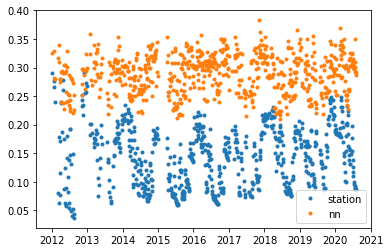

5
SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000
new lat
[48.264]
[15.173]
prev lat
[48.264]
[15.173]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
5
SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000
new lat
[48.264]
[15.173]
prev lat
[48.264]
[15.173]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
5
SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000
new lat
[48.264]
[15.173]
prev lat
[48.264]
[15.173]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
5
SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000
new lat
[48.264]
[15.173]
prev lat
[48.264]
[15.173]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
5
SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000
new lat
[48.264]
[15.173]
prev lat
[48.264]
[15.173]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
5
SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000
new lat
[48.264]
[15.173]
prev lat
[48.264]
[15.173]
[ True]
[ True]
[0.]
[0.]
Fa

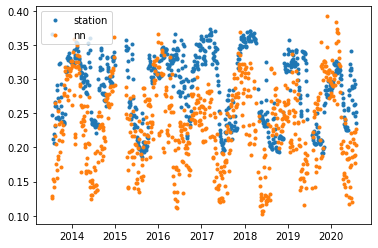

6
Decagon-5TE-A_soil_moisture_0.000000_0.050000
new lat
[55.864]
[9.208]
prev lat
[55.864]
[9.208]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
6
Decagon-5TE-A_soil_moisture_0.000000_0.050000
new lat
[55.864]
[9.208]
prev lat
[55.864]
[9.208]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
6
Decagon-5TE-B_soil_moisture_0.000000_0.050000
new lat
[55.864]
[9.208]
prev lat
[55.864]
[9.208]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
6
Decagon-5TE-A_soil_moisture_0.000000_0.050000
new lat
[56.212]
[9.208 9.467]
prev lat
[55.864]
[9.208]
[False]
[ True False]
[0.348]
[0.    0.259]
True
False
False
False
7
Decagon-5TE-B_soil_moisture_0.000000_0.050000
new lat
[56.212]
[9.208 9.467]
prev lat
[56.212]
[9.208 9.467]
[ True]
[ True  True]
[0.]
[0. 0.]
False
False
True
True
7
Decagon-5TE-A_soil_moisture_0.000000_0.050000
new lat
[55.864]
[9.208]
prev lat
[56.212]
[9.208 9.467]
[ True]
[ True  True]
[0.348]
[0.    0.259]
True
False
False
False
8
Decagon-5TE-B_soil_moisture_0.000000_0.050000

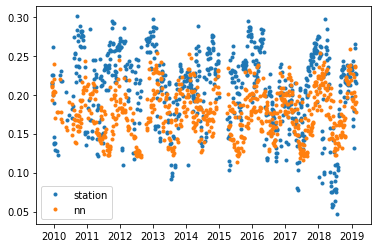

15
TDR-Soil-Moisture-Equipment-Corp.-TRASE-BE_soil_moisture_0.050000_0.050000
new lat
[43.237]
[12.32]
prev lat
[43.237]
[12.32]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
15
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[1.864]
[103.357]
prev lat
[43.237]
[12.32]
[ True]
[False]
[41.373]
[91.037]
True
True
False
False
low correlation
Sensors at 'MARDI-L1': ['WaterScout-SM100_soil_moisture_0.950000_1.000000', 'WaterScout-SM100_soil_moisture_0.450000_0.500000', 'WaterScout-SM100_soil_moisture_0.000000_0.050000']
Stations in 'MySMNet': ['MARDI-L1', 'MARDI-L2', 'MARDI-L4', 'MPOB-BL1', 'MPOB-BL2', 'MPOB2012', 'MPOB401']


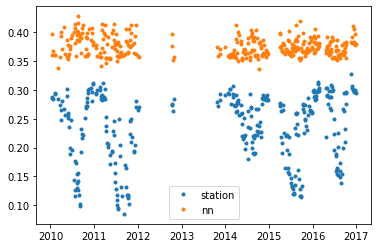

16
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[2.06]
[103.357]
prev lat
[1.864]
[103.357]
[False]
[ True]
[0.196]
[0.]
True
False
False
False
16
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[1.864]
[103.357]
prev lat
[2.06]
[103.357]
[ True]
[ True]
[0.196]
[0.]
True
False
False
False
16
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[1.864]
[103.357]
prev lat
[1.864]
[103.357]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
16
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[1.864]
[103.357]
prev lat
[1.864]
[103.357]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
16
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[1.864]
[103.357]
prev lat
[1.864]
[103.357]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
16
WaterScout-SM100_soil_moisture_0.000000_0.050000
new lat
[1.864]
[103.357]
prev lat
[1.864]
[103.357]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
16
TRASE-16-B_soil_moisture_0.050000_0.050000
new lat
[48.852]
[3.242]
prev 

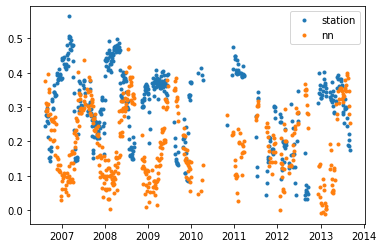

21
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[-34.696]
[146.153]
prev lat
[-35.412]
[147.45]
[False]
[ True]
[0.716]
[1.297]
True
True
False
False
22
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[-35.412]
[147.45]
prev lat
[-34.696]
[146.153]
[ True]
[False]
[0.716]
[1.297]
True
True
False
False
23
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[-34.934]
[146.412]
prev lat
[-35.412]
[147.45]
[False]
[ True]
[0.478]
[1.038]
True
True
False
False
24
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[-35.412]
[147.45]
prev lat
[-34.934]
[146.412]
[ True]
[False]
[0.478]
[1.038]
True
True
False
False
25
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[-34.696]
[146.412]
prev lat
[-35.412]
[147.45]
[False]
[ True]
[0.716]
[1.038]
True
True
False
False
26
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[-34.696]
[145.893 146.153]
prev lat
[-34.696]
[146.412]
[ True]
[ True  True]
[0.]
[0.519 0.259]
False
True
Tru

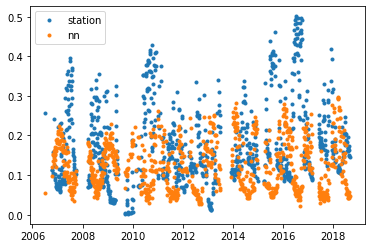

37
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[41.391]
[-5.058]
prev lat
[41.132]
[-5.317]
[False]
[False]
[0.259]
[0.259]
True
True
False
False
38
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[41.132 41.391]
[-5.317]
prev lat
[41.391]
[-5.058]
[ True  True]
[ True]
[0.259 0.   ]
[0.259]
False
True
True
True
39
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[41.132]
[-5.576]
prev lat
[41.132 41.391]
[-5.317]
[ True  True]
[ True]
[0.    0.259]
[0.259]
False
True
True
True
40
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[41.391]
[-5.317]
prev lat
[41.132]
[-5.576]
[False]
[False]
[0.259]
[0.259]
True
True
False
False
40
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[41.391]
[-5.317]
prev lat
[41.391]
[-5.317]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
40
Stevens-Hydra-Probe_soil_moisture_0.000000_0.050000
new lat
[41.391]
[-5.317]
prev lat
[41.391]
[-5.317]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
40
S

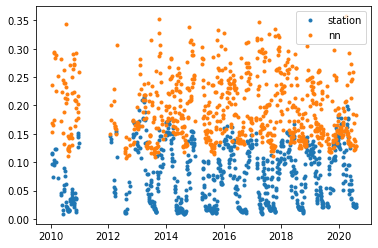

53
5TM_soil_moisture_0.000000_0.050000
new lat
[44.045]
[25.288]
prev lat
[44.045]
[27.882]
[ True]
[ True]
[0.]
[2.594]
False
True
True
True
53
5TM_soil_moisture_0.000000_0.050000
new lat
[44.59]
[23.213]
prev lat
[44.045]
[25.288]
[False]
[ True]
[0.545]
[2.075]
True
True
False
False
54
5TM_soil_moisture_0.000000_0.050000
new lat
[45.416]
[21.138]
prev lat
[44.59]
[23.213]
[False]
[ True]
[0.826]
[2.075]
True
True
False
False
55
5TM_soil_moisture_0.000000_0.050000
new lat
[46.255]
[27.623]
prev lat
[45.416]
[21.138]
[False]
[False]
[0.839]
[6.485]
True
True
False
False
low correlation
Sensors at 'Barlad': ['HMP155-Vaisala_air_temperature_-2.000000_-2.000000', '5TM_soil_temperature_0.000000_0.050000', '5TM_soil_moisture_0.000000_0.050000', 'HMP155_air_temperature_-2.000000_-2.000000', 'QMR102_precipitation_-1.400000_-1.400000']
Stations in 'RSMN': ['Adamclisi', 'Alexandria', 'Bacles', 'Banloc', 'Barlad', 'Calarasi', 'ChisineuCris', 'Corugea', 'Cotnari', 'Darabani', 'Dej', 'Dumbraveni'

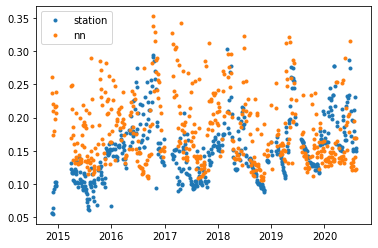

56
5TM_soil_moisture_0.000000_0.050000
new lat
[44.317]
[27.363]
prev lat
[46.255]
[27.623]
[ True]
[ True]
[1.938]
[0.26]
True
True
False
False
57
5TM_soil_moisture_0.000000_0.050000
new lat
[46.538]
[21.657]
prev lat
[44.317]
[27.363]
[False]
[ True]
[2.221]
[5.706]
True
True
False
False
58
5TM_soil_moisture_0.000000_0.050000
new lat
[44.864]
[28.401]
prev lat
[46.538]
[21.657]
[ True]
[False]
[1.674]
[6.744]
True
True
False
False
59
5TM_soil_moisture_0.000000_0.050000
new lat
[47.107]
[21.916]
prev lat
[44.864]
[28.401]
[False]
[ True]
[2.243]
[6.485]
True
True
False
False
low correlation
Sensors at 'Oradea': ['5TM_soil_moisture_0.000000_0.050000', '5TM_soil_temperature_0.000000_0.050000', 'HMP45DX_air_temperature_-2.000000_-2.000000', 'VRG101_precipitation_-1.400000_-1.400000']
Stations in 'RSMN': ['Adamclisi', 'Alexandria', 'Bacles', 'Banloc', 'Barlad', 'Calarasi', 'ChisineuCris', 'Corugea', 'Cotnari', 'Darabani', 'Dej', 'Dumbraveni', 'Iasi', 'Oradea', 'RosioriideVede', 'Sannicola

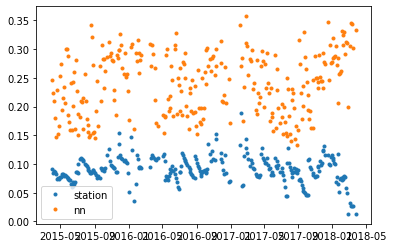

60
5TM_soil_moisture_0.000000_0.050000
new lat
[44.045]
[25.029]
prev lat
[47.107]
[21.916]
[ True]
[False]
[3.062]
[3.113]
True
True
False
False
61
5TM_soil_moisture_0.000000_0.050000
new lat
[45.974]
[20.62]
prev lat
[44.045]
[25.029]
[False]
[ True]
[1.929]
[4.409]
True
True
False
False
62
5TM_soil_moisture_0.000000_0.050000
new lat
[47.682]
[22.954]
prev lat
[45.974]
[20.62]
[False]
[False]
[1.708]
[2.334]
True
True
False
False
low correlation
Sensors at 'SatuMare': ['QMR102_precipitation_-1.400000_-1.400000', '5TM_soil_moisture_0.000000_0.050000', '5TM_soil_temperature_0.000000_0.050000', 'HMP45DX_air_temperature_-2.000000_-2.000000']
Stations in 'RSMN': ['Adamclisi', 'Alexandria', 'Bacles', 'Banloc', 'Barlad', 'Calarasi', 'ChisineuCris', 'Corugea', 'Cotnari', 'Darabani', 'Dej', 'Dumbraveni', 'Iasi', 'Oradea', 'RosioriideVede', 'SannicolauMare', 'SatuMare', 'Slatina', 'Slobozia', 'Tecuci']


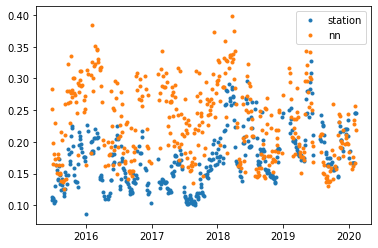

63
5TM_soil_moisture_0.000000_0.050000
new lat
[44.317]
[24.251]
prev lat
[47.682]
[22.954]
[ True]
[False]
[3.365]
[1.297]
True
True
False
False
low correlation
Sensors at 'Slatina': ['5TM_soil_moisture_0.000000_0.050000', '5TM_soil_temperature_0.000000_0.050000', 'QMR102_precipitation_-1.400000_-1.400000', 'HMP45DX_air_temperature_-2.000000_-2.000000']
Stations in 'RSMN': ['Adamclisi', 'Alexandria', 'Bacles', 'Banloc', 'Barlad', 'Calarasi', 'ChisineuCris', 'Corugea', 'Cotnari', 'Darabani', 'Dej', 'Dumbraveni', 'Iasi', 'Oradea', 'RosioriideVede', 'SannicolauMare', 'SatuMare', 'Slatina', 'Slobozia', 'Tecuci']


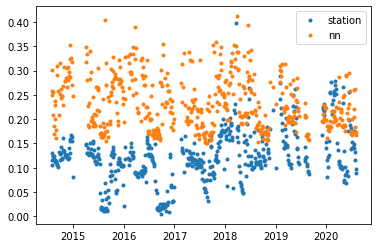

64
5TM_soil_moisture_0.000000_0.050000
new lat
[44.59]
[27.363]
prev lat
[44.317]
[24.251]
[False]
[False]
[0.273]
[3.112]
True
True
False
False
65
5TM_soil_moisture_0.000000_0.050000
new lat
[45.974]
[27.363]
prev lat
[44.59]
[27.363]
[False]
[ True]
[1.384]
[0.]
True
False
False
False
low correlation
Sensors at 'Tecuci': ['QMR102_precipitation_-1.400000_-1.400000', '5TM_soil_moisture_0.000000_0.050000', '5TM_soil_temperature_0.000000_0.050000', 'HMP155-Vaisala_air_temperature_-2.000000_-2.000000', 'HMP155_air_temperature_-2.000000_-2.000000']
Stations in 'RSMN': ['Adamclisi', 'Alexandria', 'Bacles', 'Banloc', 'Barlad', 'Calarasi', 'ChisineuCris', 'Corugea', 'Cotnari', 'Darabani', 'Dej', 'Dumbraveni', 'Iasi', 'Oradea', 'RosioriideVede', 'SannicolauMare', 'SatuMare', 'Slatina', 'Slobozia', 'Tecuci']


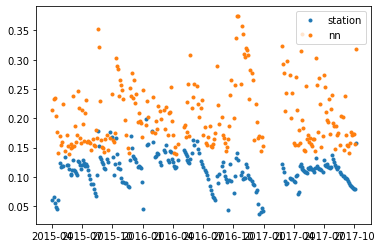

66
CS616_soil_moisture_0.000000_0.050000
new lat
[-32.352]
[150.562]
prev lat
[45.974]
[27.363]
[ True]
[False]
[78.326]
[123.199]
True
True
False
False
67
CS616_soil_moisture_0.000000_0.050000
new lat
[-31.891]
[150.043]
prev lat
[-32.352]
[150.562]
[False]
[ True]
[0.461]
[0.519]
True
True
False
False
67
CS616_soil_moisture_0.000000_0.050000
new lat
[-32.121]
[150.303]
prev lat
[-31.891]
[150.043]
[ True]
[False]
[0.23]
[0.26]
True
True
False
False
67
CS616_soil_moisture_0.000000_0.050000
new lat
[-32.352]
[149.784]
prev lat
[-32.121]
[150.303]
[ True]
[ True]
[0.231]
[0.519]
True
True
False
False
67
CS616_soil_moisture_0.000000_0.050000
new lat
[-31.891]
[150.562 150.303]
prev lat
[-32.352]
[149.784]
[False]
[False False]
[0.461]
[0.778 0.519]
True
True
False
False
68
CS616_soil_moisture_0.000000_0.050000
new lat
[-32.121]
[150.043]
prev lat
[-31.891]
[150.562 150.303]
[ True]
[ True  True]
[0.23]
[0.519 0.26 ]
True
True
False
False
68
CS616_soil_moisture_0.000000_0.050000
new lat
[

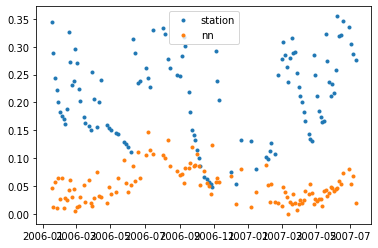

70
ThetaProbe-ML3_soil_moisture_0.050000_0.050000
new lat
[44.59]
[4.28]
prev lat
[13.359]
[30.476]
[False]
[ True]
[31.231]
[26.196]
True
True
False
False
71
ThetaProbe-ML2X_soil_moisture_0.050000_0.050000
new lat
[44.59]
[4.28]
prev lat
[44.59]
[4.28]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
71
ThetaProbe-ML2X_soil_moisture_0.050000_0.050000
new lat
[44.59]
[4.539]
prev lat
[44.59]
[4.28]
[ True]
[False]
[0.]
[0.259]
False
True
True
True
72
ThetaProbe-ML3_soil_moisture_0.050000_0.050000
new lat
[44.59]
[4.539]
prev lat
[44.59]
[4.539]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
72
ThetaProbe-ML2X_soil_moisture_0.050000_0.050000
new lat
[43.774]
[5.058]
prev lat
[44.59]
[4.539]
[ True]
[False]
[0.816]
[0.519]
True
True
False
False
73
ThetaProbe-ML3_soil_moisture_0.050000_0.050000
new lat
[44.045]
[0.389]
prev lat
[43.774]
[5.058]
[False]
[ True]
[0.271]
[4.669]
True
True
False
False
74
ThetaProbe-ML2X_soil_moisture_0.050000_0.050000
new lat
[44.045]
[0.389]
prev lat
[44.045

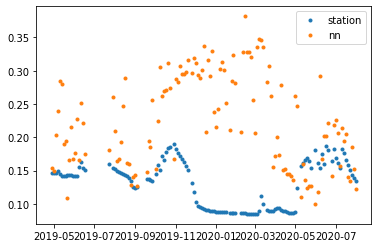

93
Hydraprobe-II-Sdi-12-C_soil_moisture_0.050000_0.050000
new lat
[50.968]
[6.355]
prev lat
[50.968]
[6.355]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
93
Hydraprobe-II-Sdi-12-B_soil_moisture_0.050000_0.050000
new lat
[50.968]
[6.355]
prev lat
[50.968]
[6.355]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
93
Hydraprobe-II-Sdi-12-C_soil_moisture_0.050000_0.050000
new lat
[50.968]
[6.355]
prev lat
[50.968]
[6.355]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
93
Hydraprobe-II-Sdi-12-A_soil_moisture_0.050000_0.050000
new lat
[50.968]
[6.355]
prev lat
[50.968]
[6.355]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
93
Hydraprobe-II-Sdi-12-B_soil_moisture_0.050000_0.050000
new lat
[50.968]
[6.355]
prev lat
[50.968]
[6.355]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
93
Hydraprobe-II-Sdi-12-A_soil_moisture_0.050000_0.050000
new lat
[50.968]
[6.355]
prev lat
[50.968]
[6.355]
[ True]
[ True]
[0.]
[0.]
False
False
True
True
93
Hydraprobe-II-Sdi-12-C_soil_moisture_0.050000_0.050000


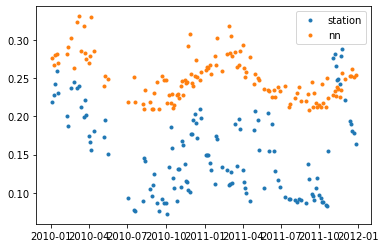

97
CS615_soil_moisture_0.025000_0.025000
new lat
[52.539]
[-4.02]
prev lat
[52.539]
[-4.02]
[ True]
[ True]
[0.]
[0.]
False
False
True
True


In [32]:
count = 0
flag = 0
first_flag = 1
collecting_flag =0

output_df = pd.DataFrame({'lat': [], 'lon': [], 'climate': [], 'cor': [], 'sample': [], 'station':[], 'network':[], 'sensor':[]} )
for network, station, sensor in ismn_data.collection.iter_sensors(variable='soil_moisture',
                                                                  depth=[0., 0.05]):
    data = sensor.read_data()
    data = data.reset_index()
    fullnum = data.shape[0]
    data1 = data[data['soil_moisture_flag']=='G']
    num = data1.shape[0]
    if num/fullnum < 0.8:
        continue
        
    data = data[data['soil_moisture']>0]
    data['date'] = data['date_time'].dt.date
    data = data.groupby(['date']).mean().reset_index()
    num = data.shape[0]
    if num > 300:
        meta = sensor.metadata.to_dict()
        net = network
        st = station
        sen = sensor
        
        lat = meta['latitude'][0][0] 
        lon = meta['longitude'][0][0]
        cl = meta['climate_KG'][0][0]

        df_m_block1 = data[data['date']<sm2]
        df_m_block2 = data[data['date']>=sm2]
        df_m_block2 = df_m_block2[df_m_block2['date']<sm3]
        df_m_block3 = data[data['date']>=sm3]
        
        len1 = df_m_block1.shape[0]
        len2 = df_m_block2.shape[0]
        len3 = df_m_block3.shape[0]
        flag1 =0
        flag2 =0
        flag3 =0
        
        if len1>0:
            
            first_day1 = df_m_block1.iloc[0, df_m_block1.columns.get_loc("date")]
            sm_day1 = nearest(dates1, first_day1)
            df_m_block1_tr = df_m_block1[df_m_block1['date']>=first_day1+abs(sm_day1-first_day1)]
            df_m_block1_tr['date'] =  pd.to_datetime(df_m_block1_tr['date'], infer_datetime_format=True)
            g1 = df_m_block1_tr.groupby([pd.Grouper(key="date", freq="3D")]).mean()
        else:
            flag1 = 1

            
            
        if len2>0:    
            
            first_day2 = df_m_block2.iloc[0, df_m_block2.columns.get_loc("date")]
            sm_day2 = nearest(dates2, first_day2)
            df_m_block2_tr = df_m_block2[df_m_block2['date']>=first_day2+abs(sm_day2-first_day2)]
            df_m_block2_tr['date'] =  pd.to_datetime(df_m_block2_tr['date'], infer_datetime_format=True)
            g2 = df_m_block2_tr.groupby([pd.Grouper(key="date", freq="3D")]).mean()
        else:
            flag2 = 10

        
        if len3>0:
            first_day3 = df_m_block3.iloc[0, df_m_block3.columns.get_loc("date")]
            sm_day3 = nearest(dates2, first_day3)
            df_m_block3_tr = df_m_block3[df_m_block3['date']>=first_day3+abs(sm_day3-first_day3)]
            df_m_block3_tr['date'] =  pd.to_datetime(df_m_block3_tr['date'], infer_datetime_format=True)
            g3 = df_m_block3_tr.groupby([pd.Grouper(key="date", freq="3D")]).mean()           
        else:
            flag3 = 100


        flag=flag1+flag2+flag3
        
        if flag ==0:
            
            g = pd.concat([g1, g2, g3]).reset_index()
        if flag ==1:
            g = pd.concat([ g2, g3]).reset_index()
        if flag ==10:
            g = pd.concat([ g1, g3]).reset_index()  
        if flag ==100:
            g = pd.concat([ g2, g1]).reset_index()  
        if flag ==11:
            g = pd.concat([ g3]).reset_index()
        if flag ==101:
            g = pd.concat([ g2]).reset_index()    
        if flag ==110:
            g = pd.concat([ g1]).reset_index()
        if flag == 111:
            g = pd.DataFrame({'date': [], 'soil_moisture': []})
            
        g= g.dropna()    
            
        
        lat_th = 0.17   
        db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()
        ll = db_br_cst['lat'].unique()
        if len(ll)>1:
           # print(ll)
           # print(np.abs(ll[0]-lat))
           # print(np.abs(ll[1] -lat))
            #print(min(np.abs(ll[0]-lat), np.abs(ll[1] -lat)))
            lat_th = min(np.abs(ll[0]-lat), np.abs(ll[1] -lat))  +0.01
            db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()    
        if len(ll)<1:
            continue
 
        lon_th = 0.17 
        db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th]
        ln = db_br_cst['lon'].unique()
        if len(ln)>1:
           # print(ll)
           # print(np.abs(ll[0]-lat))
           # print(np.abs(ll[1] -lat))
            #print(min(np.abs(ll[0]-lat), np.abs(ll[1] -lat)))
            lon_th = min(np.abs(ln[0]-lon), np.abs(ln[1] -lon))  +0.01
            db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th].copy()    
        if len(ln)<1:
            continue
        
        if first_flag:
            prev_lat = db_br_cst['lat'].unique()
            prev_lon = db_br_cst['lon'].unique()
            g_collect = g
            first_flag =0
            
        else:
            new_lat = db_br_cst['lat'].unique()
            new_lon = db_br_cst['lon'].unique()
            print(count)
            print(sen)
            print('new lat')
            print(new_lat)
            print(new_lon)
            print('prev lat')
            print(prev_lat)
            print(prev_lon)
            print (new_lat-prev_lat<0.1)
            print(new_lon-prev_lon<0.1)
            print(np.abs(new_lat-prev_lat))
            print(np.abs(new_lon - prev_lon))
            print(np.abs(new_lat-prev_lat).all())
            print(np.abs(new_lon - prev_lon).all())
            print(np.abs(new_lat-prev_lat).all()<0.1)
            print(np.abs(new_lat-prev_lat).all()<0.1)

            
            if (np.abs(new_lat-prev_lat).all()<0.1) and (np.abs(new_lon - prev_lon).all()<0.1):
                g_collect = pd.concat([g_collect, g])
            
            else:
                prev_lat = new_lat
                prev_lon = new_lon
                
                g_mean = g_collect.groupby(by=["date"]).median()
                g_mean = g_mean.reset_index()
                
                compare = pd.merge(db_br_cst, g_mean, on ='date')

                n = compare.shape[0]
        
        
        
                if n > 100:
                    cor = compare['soil_moisture'].corr(compare['nn_out'])
            
                    if np.isnan(cor):
                        print('nan in correlation')
                        print(compare.head())
                        print(compare.shape)
                
                        print(compare.isna().sum())
                    if cor <0.4:
                        if flag <10:
                            print('low correlation')
                            print(st)
                            print(net)
                            plt.plot(compare['date'], compare['soil_moisture'], '.', label = 'station')
                            plt.plot(compare['date'], compare['nn_out'], '.', label = 'nn' )
                            plt.legend()
                            plt.show()
       
                    output_df_c = pd.DataFrame({'lat': [lat], 'lon': [lon], 'climate': [cl], 'cor': [cor], 'sample': [n], 'station':[st], 'network':[net], 'sensor':[sen]})   
                    output_df = pd.concat([output_df, output_df_c])
       
                    count = count+1
                
                g_collect = g
                
             
            
                
        
        

In [34]:
#out.to_csv('good_one_Americas_Decfull.csv', index = False)
out = pd.read_csv('good_one_NOTAmericas_Decfull.csv')
#new_out.head(15)

In [140]:
out.to_csv('comparison_no_us_more_details_try2.csv', index = False)



In [73]:
sensor = ismn_data['CTP_SMTMN']['L01']['EC-TM_soil_moisture_0.000000_0.050000']
ts = sensor.read_data()
sensor2 = ismn_data['CTP_SMTMN']['L03']['EC-TM_soil_moisture_0.000000_0.050000']
ts2 = sensor2.read_data()
for_ts = db[np.abs(db['lat']-31.946)<0.13].copy()
        #    print(db_br_cst.shape)
for_ts = for_ts[np.abs(for_ts['lon']-91.721)<0.1]
print('lat')
print(list(for_ts['lat'].unique()))
print('lon')
print(list(for_ts['lon'].unique()))

for_ts2 = db[np.abs(db['lat']-31.843)<0.13].copy()
        #    print(db_br_cst.shape)
for_ts2 = for_ts2[np.abs(for_ts2['lon']-91.706)<0.1]
print('lat')
print(list(for_ts2['lat'].unique()))
print('lon')
print(list(for_ts2['lon'].unique()))




lat
[31.891]
lon
[91.686]
lat
[31.891]
lon
[91.686]


In [105]:
A = for_ts['lat'].unique()

In [103]:
B = for_ts2['lat'].unique()
B

array([31.891])

In [145]:
counter = 0
for network, station, sensor in ismn_data2.collection.iter_sensors(variable='soil_moisture',
                                                                 depth=[0., 0.05]):
    counter = counter +1 
    net = network
    st = station
    sen = sensor
    if counter <800:
        print(net)
        print(sen)

Stations in 'ARM': ['Anthony', 'Ashton', 'Byron', 'Coldwater', 'Cordell', 'Cyril', 'Earlsboro', 'El_Reno', 'Elk_Falls', 'Halstead', 'Hillsboro', 'Lamont_CF1', 'Lamont_CF2', 'Larned', 'LeRoy', 'Maple_City', 'Marshall', 'Medford', 'Meeker', 'Morris', 'Morrison', 'Newkirk', 'Okmulgee', 'Omega', 'Pawhuska', 'Pawnee', 'Plevna', 'Ringwood', 'Towanda', 'Tryon', 'Tyro', 'Valley_Floor', 'Vici', 'Waukomis']
SMP1-A_soil_moisture_0.030000_0.030000
Stations in 'ARM': ['Anthony', 'Ashton', 'Byron', 'Coldwater', 'Cordell', 'Cyril', 'Earlsboro', 'El_Reno', 'Elk_Falls', 'Halstead', 'Hillsboro', 'Lamont_CF1', 'Lamont_CF2', 'Larned', 'LeRoy', 'Maple_City', 'Marshall', 'Medford', 'Meeker', 'Morris', 'Morrison', 'Newkirk', 'Okmulgee', 'Omega', 'Pawhuska', 'Pawnee', 'Plevna', 'Ringwood', 'Towanda', 'Tryon', 'Tyro', 'Valley_Floor', 'Vici', 'Waukomis']
SMP1-B_soil_moisture_0.030000_0.030000
Stations in 'ARM': ['Anthony', 'Ashton', 'Byron', 'Coldwater', 'Cordell', 'Cyril', 'Earlsboro', 'El_Reno', 'Elk_Falls', 

Stations in 'SCAN': ['AAMU-jtg', 'Abrams', 'Adams_Ranch_#1', 'Alcalde', 'Alkali_Mesa', 'Allen_Farms', 'Ames', 'Aniak', 'Ash_Valley', 'Beasley_Lake', 'Beaumont', 'Block_3_WX', 'Blue_Creek', 'Bodie_Hills', 'Bosque_Seco', 'Bragg_Farm', 'Broad_Acres', 'Buckhorn', 'Buffalo_Jump', 'Busby_Farm', 'Bushland_#1', 'CMRB_LTAR-MO', 'Cache_Junction', 'Canyon_Lake', 'Carver_Farm', 'Cave_Valley', 'Centralia_Lake', 'Charkiln', 'Checkers_Creek', 'Chicken_Ridge', 'Cinnamon_Bay', 'Circleville', 'Cochora_Ranch', 'Combate', 'Conrad_Ag_Rc', 'Cook_Farm_Field_D', 'Corozal', 'Cper', 'Crescent_Lake_#1', 'Crossroads', 'Cullman-NAHRC', 'Death_Valley_JCT', 'Dee_River_Ranch', 'Deep_Springs', 'Desert_Center', 'Dexter', 'Doe_Ridge', 'Dugway', 'Eagle_Lake', 'Eastland', 'Eastview_Farm', 'Elsberry_PMC', 'Enterprise', 'Ephraim', 'Eros_Data_Center', 'Essex', 'Everglades_Ars', 'Ford_Dry_Lake', 'Fort_Assiniboine_#1', 'Fort_Reno_#1', 'Fortuna', 'French_Gulch', 'Geneva_#1', 'Glacial_Ridge', 'Goodwin_Creek_Pasture', 'Goodwin_Cr

In [134]:
sensor = 'Decagon-5TE-B_soil_moisture_0.000000_0.050000'

one station

In [163]:
data_st = ismn_data.collection['HOAL']['Hoal-08']['SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000'] 
data_st

SPADE-Time-Domain-Transmissivity-A_soil_moisture_0.050000_0.050000

In [164]:
data_st.metadata

MetaData([
  MetaVar([clay_fraction, 22.0, Depth([0.0, 0.3])]),
  MetaVar([climate_KG, Dfb, None]),
  MetaVar([climate_insitu, unknown, None]),
  MetaVar([elevation, 274.93, None]),
  MetaVar([instrument, SPADE-Time-Domain-Transmissivity-A, Depth([0.05, 0.05])]),
  MetaVar([latitude, 48.15473, None]),
  MetaVar([lc_2000, 10.0, None]),
  MetaVar([lc_2005, 10.0, None]),
  MetaVar([lc_2010, 10.0, None]),
  MetaVar([lc_insitu, unknown, None]),
  MetaVar([longitude, 15.14844, None]),
  MetaVar([network, HOAL, None]),
  MetaVar([organic_carbon, 0.74, Depth([0.0, 0.3])]),
  MetaVar([sand_fraction, 41.0, Depth([0.0, 0.3])]),
  MetaVar([saturation, 0.43, Depth([0.0, 0.3])]),
  MetaVar([silt_fraction, 37.0, Depth([0.0, 0.3])]),
  MetaVar([station, Hoal-08, None]),
  MetaVar([timerange_from, 2013-07-19 18:00:00, None]),
  MetaVar([timerange_to, 2019-12-31 02:00:00, None]),
  MetaVar([variable, soil_moisture, Depth([0.05, 0.05])])
])

In [165]:
lat = 48.15473
lon = 15.14844 

In [167]:
db_br_cst = db[np.abs(db['lat']-lat)<0.16].copy()
ll = db_br_cst['lat'].unique()
db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<0.14]
ln = db_br_cst['lon'].unique()
print(ll)
print(ln)

[48.264]
[15.173]


In [122]:
file = '/Users/olyaskulovich/overlap_smap_smos_final_July_NOstd.pkl' 
smap = pd.read_pickle(file)
smap = smap[['date', 'lat', 'lon', 'sm_am', 'sm_am_seas_med']]

In [168]:
smap_1 = smap[np.abs(smap['lat']-lat)<0.16].copy()
ll2 = smap_1['lat'].unique()
smap_1 = smap_1[np.abs(smap_1['lon']-lon)<0.14]
ln2 = smap_1['lon'].unique()

In [125]:
ll2

array([39.343, 39.595])

In [177]:
ts = data_st.read_data()
ts = ts.reset_index()
ts = ts[ts['soil_moisture_flag']=='G']
ts['date'] = ts['date_time'].dt.date
ts = ts.reset_index()
ts['3dm'] =  ts['soil_moisture'].rolling(window=3).mean()


#ts.head()
#data = ts.groupby(['date']).mean().reset_index()
#g1 = data.groupby([pd.Grouper(key="date", freq="3D")]).mean()
#g1 =g1.reset_index()

In [171]:
db_br_cst = db_br_cst[db_br_cst['date']>'2012-05-01']
#db_br_cst = db_br_cst[db_br_cst['date']<'2018-01-01']
#smap_1 = smap_1 [smap_1['date']< '2018-01-01']


In [183]:
ts['date'] = pd.to_datetime(ts['date'], infer_datetime_format=True)
ts.dtypes

index                               int64
date_time                  datetime64[ns]
soil_moisture                     float64
soil_moisture_flag                 object
soil_moisture_orig_flag            object
date                       datetime64[ns]
3dm                               float64
dtype: object

In [184]:
compare = pd.merge(db_br_cst, ts, on ='date')

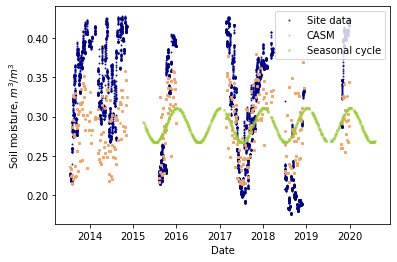

In [185]:
#fig=plt.figure(figsize=(12, 6))
#ts['3dm'] =  ts['soil_moisture'].rolling(window=3).mean()

plt.plot(compare['date'], compare['3dm'], '.', alpha = 0.8, markersize= 2, color = 'darkblue',  label = 'Site data')
plt.plot(compare['date'], compare['str_mean'], '.', alpha = 0.8, markersize= 2, color = 'sandybrown',  label = 'CASM')
plt.plot(smap_1['date'], smap_1['sm_am_seas_med'], 'x', alpha = 0.8, markersize= 2, color='yellowgreen', label = 'Seasonal cycle')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Soil moisture, $m^3/m^3$')
plt.savefig('seasonal_on_hoal.pdf', bbox_inches='tight')


plt.show()



In [77]:
comp_g1 = smap_1.merge(db_br_cst, on ='date',  how = 'outer')



In [78]:
comp_g1['sm_am'].corr(comp_g1['str_mean'] )

0.7957700413528651

for station - nn = cor = 0.19

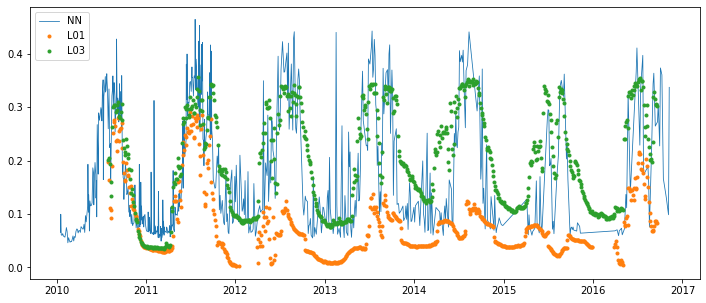

In [100]:
fig=plt.figure(figsize=(12,5))

plt.plot(for_ts['date'], for_ts['nn_output'], linewidth = 0.8, label = 'NN')



plt.plot(ts1['date_time'], ts1['soil_moisture'], '.', label = 'L01')
plt.plot(ts22['date_time'], ts22['soil_moisture'], '.', label = 'L03')
plt.legend()
plt.show()

In [192]:
netw = 'WSMN'
sns = 'CS615_soil_moisture_0.025000_0.025000'

sensor = ismn_data[netw]['WSMN-3'][sns]
ts = sensor.read_data().reset_index()
#sensor2 = ismn_data[netw]['SQ02'][sns]
#ts2 = sensor2.read_data().reset_index()
#sensor2 = ismn_data[netw]['SQ07'][sns]
#ts3 = sensor2.read_data().reset_index()
#sensor2 = ismn_data[netw]['SQ21'][sns]
#ts4 = sensor2.read_data().reset_index()
#sensor2 = ismn_data[netw]['CST-05'][sns]
#ts5 = sensor2.read_data().reset_index()
#sensor2 = ismn_data['BIEBRZA_S-1']['grassland-soil-6']['GS-3_soil_moisture_0.050000_0.050000']
#ts6 = sensor2.read_data().reset_index()
#sensor2 = ismn_data['BIEBRZA_S-1']['grassland-soil-8']['GS-3_soil_moisture_0.050000_0.050000']
#ts7 = sensor2.read_data().reset_index()
#sensor2 = ismn_data['BIEBRZA_S-1']['grassland-soil-9']['GS-3_soil_moisture_0.050000_0.050000']
#ts8 = sensor2.read_data().reset_index()
lat1 = 52.42222
lon1 = -4.068

for_ts = db[np.abs(db['lat']-lat1)<0.13].copy()
print(db_br_cst.shape)
for_ts = for_ts[np.abs(for_ts['lon']-lon1)<0.13]
print('lat')
print(list(for_ts['lat'].unique()))
print('lon')
print(list(for_ts['lon'].unique()))

for_ts = for_ts.sort_values(by=['date'])


(1850, 6)
lat
[52.539]
lon
[-4.02]


In [196]:
sm4 = pd.to_datetime('2016-01-01', format='%Y-%m-%d')

for_ts = for_ts[for_ts['date']<sm4]



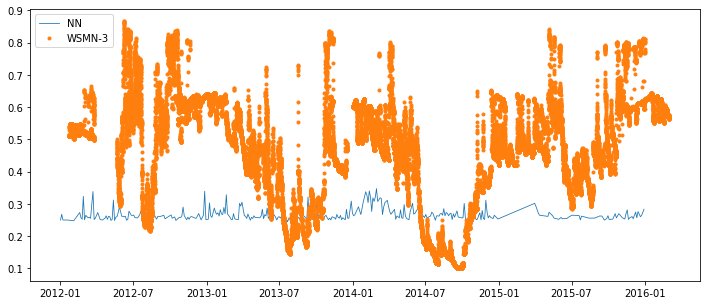

In [197]:
fig=plt.figure(figsize=(12,5))

plt.plot(for_ts['date'], for_ts['nn_output'], linewidth = 0.8, label = 'NN')



plt.plot(ts['date_time'], ts['soil_moisture'], '.', label = 'WSMN-3')
#plt.plot(ts2['date_time'], ts2['soil_moisture'], '.', label = 'SQ02')
#plt.plot(ts3['date_time'], ts3['soil_moisture'], '.', label = 'SQ07')
#plt.plot(ts4['date_time'], ts4['soil_moisture'], '.', label = 'SQ21')
#plt.plot(ts5['date_time'], ts5['soil_moisture'], '.', label = 'CST-05')
#plt.plot(ts6['date_time'], ts6['soil_moisture'], '.', label = 'grassland-soil-6')
#plt.plot(ts7['date_time'], ts7['soil_moisture'], '.', label = 'grassland-soil-8')
#plt.plot(ts8['date_time'], ts8['soil_moisture'], '.', label = 'grassland-soil-9')
plt.legend()
plt.show()

In [191]:
#ts2[ts2['date_time']>sm4].head(40)

In [148]:
for_ts = for_ts.sort_values(by=['date'])

In [81]:
sm4 = pd.to_datetime('2017-01-01', format='%Y-%m-%d')



In [91]:
ts22 = ts2.groupby([pd.Grouper(key="date_time", freq="3D")]).mean()

In [94]:
ts22 = ts22.reset_index()

In [41]:
np.median(full_out['cor'])

0.658678902

In [42]:
np.mean(full_out['cor'])

0.6265074186517777

In [2]:
#full_out.to_csv('full_in_situ_july.csv', index = False)

full_out = pd.read_csv('full_in_situ_july.csv')



In [118]:
full_out = pd.concat([out_small_for_save2, out_small_for_save])
full_out.shape

(367, 11)

In [3]:
igbp = ['Af', 'Am', 'Aw', 'BWh', 'BWk', 'BSh', 'BSk',
                       'Csa', 'Csb', 'Cwa', 'Cwb', 'Cfa', 'Cfb',
                       'Dsb', 'Dfa', 'Dfb'] #list(full_out["climate"].unique())

index = []
for val in full_out["climate"]:
    index.append(igbp.index(val))
full_out['color'] = index  

In [139]:
full_out.head()

,lat,lon,climate,cor,R2,rmse,sample,station,network,sensor,rmse_un,color
0,35.68800,-95.85600,Cfa,0.209665,-58.415355,0.151527,112,Sensors at 'Morris': ['Water-Matric-Potential-...,"Stations in 'ARM': ['Anthony', 'Ashton', 'Byro...",Water-Matric-Potential-Sensor-229L-W_soil_mois...,0.047916,0
1,38.09915,-121.49933,Csa,0.904290,0.093343,0.120723,380,Sensors at 'Bouldin_Island_Alfalfa': ['HMP-45-...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,CS655_soil_moisture_0.020000_0.020000,0.054417,1
2,38.03999,-121.72715,Csb,0.892734,0.501509,0.049130,214,Sensors at 'Sherman_Barn': ['HMP-45-C_air_temp...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,ThetaProbe-ML2X_soil_moisture_0.050000_0.050000,0.048624,2
3,38.43160,-120.96600,Csa,0.853872,0.705049,0.068331,1930,Sensors at 'Tonzi_Ranch': ['Thermocouple-type-...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,ThetaProbe-ML2X_soil_moisture_0.000000_0.000000,0.067375,1
4,38.41330,-120.95073,Csa,0.857407,0.361509,0.084136,1894,Sensors at 'Vaira_Ranch': ['Moisture-Point-PRB...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,ThetaProbe-ML2X_soil_moisture_0.000000_0.000000,0.054275,1


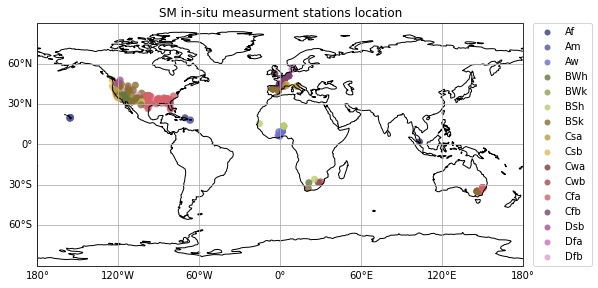

In [19]:
fig = plt.figure(figsize=(8.7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()
#ax.set_extent([-180, 0, 0, 90], crs=ccrs.PlateCarree())
ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sc = plt.scatter(x = full_out['lon'], y = full_out['lat'], c = full_out['color'], s = 50, alpha = 0.8, cmap=plt.cm.tab20b,  linewidth=0)
ax.legend(sc.legend_elements(num=len(igbp))[0], igbp, bbox_to_anchor=(1.01,1.02), loc="upper left")
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
plt.title('SM in-situ measurment stations location')
fig.savefig('s_station_loc.png', dpi = 200, bbox_inches='tight')
plt.show()

In [205]:
full_out['cor_b']=np.digitize(full_out['cor'],[0.4, 0.6, 0.8])

In [206]:
from matplotlib import colors
cmap = colors.ListedColormap(['red', 'orange', 'green', 'blue'])
bounds=[0,0.4,0.6, 0.8, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

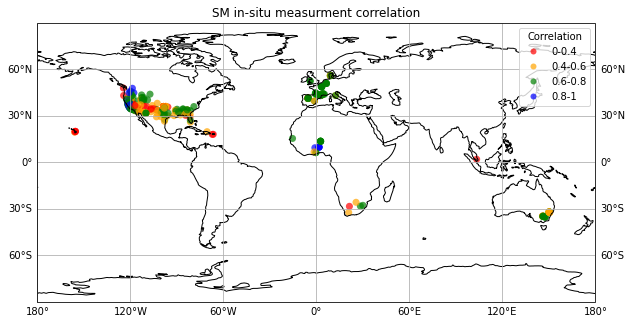

In [173]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()
#ax.set_extent([-180, 0, 0, 90], crs=ccrs.PlateCarree())    plt.cm.tab10
ax.coastlines()
gls = ax.gridlines(draw_labels=True)
gls.top_labels=False   # suppress top labels


sc = plt.scatter(x = full_out['lon'], y = full_out['lat'], c = full_out['cor_b'], s = 50, cmap=cmap, alpha = 0.7, linewidth=0)
ax.legend(sc.legend_elements()[0], ['0-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'], title="Correlation")
#plt.colorbar(sc, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 0.4, 0.6, 0.8, 1])
plt.title('SM in-situ measurment correlation')
fig.savefig('station_cor.pdf')


plt.show()

In [21]:
np.mean(full_out['cor'])

0.6281251090217984

In [129]:
np.mean(full_out['rmse_un'])

0.05455891703665974

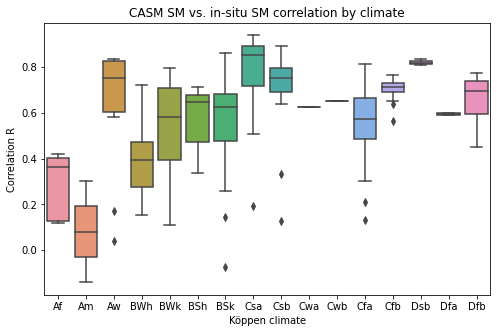

In [176]:
import seaborn as sns

fig = plt.figure(figsize=(8, 5))


sns.boxplot(x = full_out['climate'],
            y = full_out['cor'],
           order = ['Af', 'Am', 'Aw', 'BWh', 'BWk', 'BSh', 'BSk',
                       'Csa', 'Csb', 'Cwa', 'Cwb', 'Cfa', 'Cfb',
                       'Dsb', 'Dfa', 'Dfb'])
#            hue = full_out['climate'],
#           palette = 'husl')
#            hue_order = ['LAI_only', 'LAI_only_opt',  'SIF_synth', 'SIF_GOME', 'SIF_GOME_norm'])
#            hue_order = ['LAI_only', 'LAI_only_opt',  'SIF_synth',  'VOD_synth', 'VOD_data'] )

      #     hue_order = [ 'none',  '811', 'halfLAI', '+SIF_synth',  '+SIF_data', '+SIF_data_n'] )



            #hue_order = ['LAI_only', 'LAI_only_opt', 'SIF_synth', 'SIF_GOME', 'SIF_GOME01', 'SIF_GOME_norm' , 'SIF_GOME_norm01'])



           #hue_order = ['LAI_only', 'VOD', 'SIF', 'SIF_data', 'SIF_data_norm', 'SIF_VOD', 'SIF_dat_nVOD'] )
plt.title('CASM SM vs. in-situ SM correlation by climate')
plt.xlabel('Köppen climate')
plt.ylabel('Correlation R')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.savefig('in_situ_correl_box.pdf')



plt.show()

In [143]:
full_short = full_out[~full_out.climate.isin(["Af","Am","BWh"])]

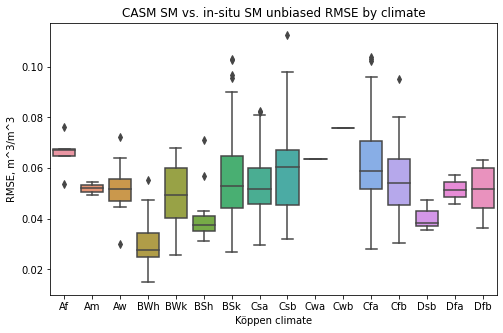

In [178]:
fig = plt.figure(figsize=(8, 5))


sns.boxplot(x = full_out['climate'],
            y = full_out['rmse_un'],
           order = ['Af', 'Am', 'Aw', 'BWh', 'BWk', 'BSh', 'BSk',
                       'Csa', 'Csb', 'Cwa', 'Cwb', 'Cfa', 'Cfb',
                       'Dsb', 'Dfa', 'Dfb'])
#            hue = full_out['climate'],
#           palette = 'husl')
#            hue_order = ['LAI_only', 'LAI_only_opt',  'SIF_synth', 'SIF_GOME', 'SIF_GOME_norm'])
#            hue_order = ['LAI_only', 'LAI_only_opt',  'SIF_synth',  'VOD_synth', 'VOD_data'] )

      #     hue_order = [ 'none',  '811', 'halfLAI', '+SIF_synth',  '+SIF_data', '+SIF_data_n'] )



            #hue_order = ['LAI_only', 'LAI_only_opt', 'SIF_synth', 'SIF_GOME', 'SIF_GOME01', 'SIF_GOME_norm' , 'SIF_GOME_norm01'])



           #hue_order = ['LAI_only', 'VOD', 'SIF', 'SIF_data', 'SIF_data_norm', 'SIF_VOD', 'SIF_dat_nVOD'] )
plt.title('CASM SM vs. in-situ SM unbiased RMSE by climate')
plt.xlabel('Köppen climate')
plt.ylabel('RMSE, m^3/m^3')


#plt.legend(loc = 'lower right')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.savefig('in_situ_rmse_box.pdf')



plt.show()

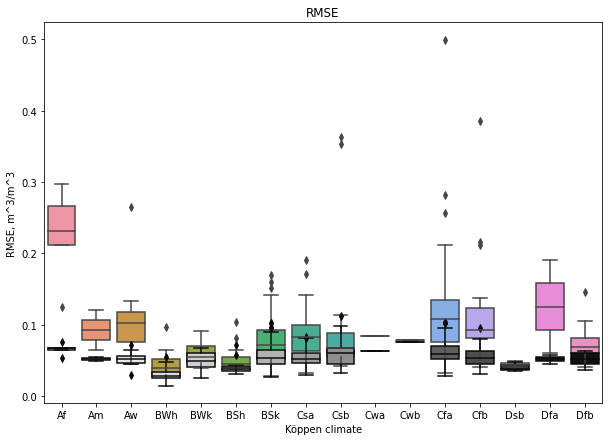

In [209]:
fig = plt.figure(figsize=(10, 7))


sns.boxplot(x = full_out['climate'],
            y = full_out['rmse'],
           order = ['Af', 'Am', 'Aw', 'BWh', 'BWk', 'BSh', 'BSk',
                       'Csa', 'Csb', 'Cwa', 'Cwb', 'Cfa', 'Cfb',
                       'Dsb', 'Dfa', 'Dfb'])
#            palette=pkmn_type_colors'])
#           palette = 'husl')





ba = sns.boxplot(x = full_out['climate'], y = full_out['rmse_un'],
                 order = ['Af', 'Am', 'Aw', 'BWh', 'BWk', 'BSh', 'BSk',
                          'Csa', 'Csb', 'Cwa', 'Cwb', 'Cfa', 'Cfb',
                          'Dsb', 'Dfa', 'Dfb'],
                palette= 'Greys')


plt.title('RMSE')
plt.xlabel('Köppen climate')
plt.ylabel('RMSE, m^3/m^3')


#plt.legend(loc = 'lower right')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


plt.show()

In [207]:
full_out['legend'] = full_out['climate']
full_out['legend'] = full_out['legend'].replace(['Cfa'],'RMSE')
full_out['legend2'] = full_out['climate']
full_out['legend2'] = full_out['legend2'].replace(['Cfa'],'Unbiased RMSE')



In [202]:
full_out.head()

,lat,lon,climate,cor,R2,rmse,sample,station,network,sensor,rmse_un,color,cor_b,legend,legend2
0,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE
1,38.09915,-121.49933,Csa,0.90429,0.093343,0.120723,380,Sensors at 'Bouldin_Island_Alfalfa': ['HMP-45-...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,CS655_soil_moisture_0.020000_0.020000,0.054417,7,3,Csa,Csa
2,38.03999,-121.72715,Csb,0.892734,0.501509,0.04913,214,Sensors at 'Sherman_Barn': ['HMP-45-C_air_temp...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,ThetaProbe-ML2X_soil_moisture_0.050000_0.050000,0.048624,8,3,Csb,Csb
3,38.4316,-120.966,Csa,0.853872,0.705049,0.068331,1930,Sensors at 'Tonzi_Ranch': ['Thermocouple-type-...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,ThetaProbe-ML2X_soil_moisture_0.000000_0.000000,0.067375,7,3,Csa,Csa
4,38.4133,-120.95073,Csa,0.857407,0.361509,0.084136,1894,Sensors at 'Vaira_Ranch': ['Moisture-Point-PRB...,Stations in 'FLUXNET-AMERIFLUX': ['Bouldin_Isl...,ThetaProbe-ML2X_soil_moisture_0.000000_0.000000,0.054275,7,3,Csa,Csa


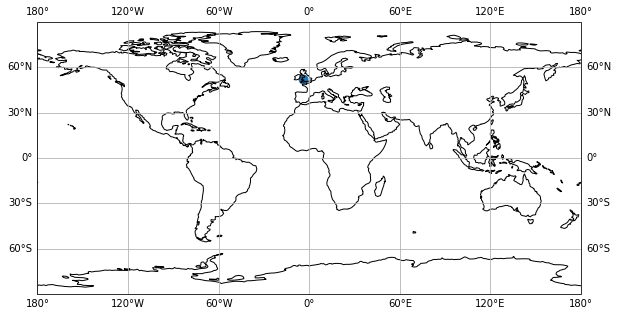

In [198]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()
#ax.set_extent([-180, 0, 0, 90], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

sc = plt.scatter(x = lon1, y = lat1,  s = 100,   linewidth=0)

plt.show()

In [7]:
dat = pd.read_csv('dates1.txt', delimiter=" ", header = None)
dat['date'] = pd.to_datetime(dat[0], format='%Y-%m-%d')
dates1 = [pd.Timestamp(x).date() for x in dat['date'].values]

dat2 = pd.read_csv('dates2.txt', delimiter=" ", header = None)
dat2['date'] = pd.to_datetime(dat2[0], format='%Y-%m-%d')
dates2 = [pd.Timestamp(x).date() for x in dat2['date'].values]

In [4]:
file_s = '/Users/olyaskulovich/overlap_smap_smos_3dm_masked_seas_sm_ssbug_cor2_out.pkl'
train = pd.read_pickle(file_s)
#train.head()

In [5]:
file_s = '/Users/olyaskulovich/smos1015_3dm_masked_seas_sm_f365_out.pkl'
smos_1015 = pd.read_pickle(file_s)
#smos_1015.head()

In [8]:
mask = pd.read_csv('land_mask.csv')

In [6]:
sm1020 = pd.concat([smos_1015[['date', 'lat', 'lon', 'nn_out']], train[['date', 'lat', 'lon', 'nn_out']]])
sm1020.shape

(140550007, 4)

In [7]:
del train
del smos_1015

In [11]:
sm1020['lat'] = normal_round(sm1020['lat'],3)
sm1020['lon'] = normal_round(sm1020['lon'],3)
sm1020_masked = sm1020.merge(mask, how='inner', on=['lat', 'lon'])
sm1020_masked.head()

,date,lat,lon,nn_output,msk
0,2010-01-15,-55.177,-69.899,0.320565,0
1,2010-01-18,-55.177,-69.899,0.334429,0
2,2010-01-21,-55.177,-69.899,0.356286,0
3,2010-01-24,-55.177,-69.899,0.335423,0
4,2010-01-27,-55.177,-69.899,0.350589,0


In [16]:
sm1020_masked.shape

(154432502, 5)

In [8]:
dates2 = sm1020['date'].unique()


#dates2 = sm1020_masked['date'].unique()
dates2 = [pd.Timestamp(x).date() for x in dates2]

In [9]:
del sm1020

In [10]:
file_e = '/Users/olyaskulovich/amsre_transfer_JAN16_out_41ep.pkl' #nn2_out_for_plot_filled_sc_fullest.pkl'
amsre= pd.read_pickle(file_e)
amsre['date'] = pd.to_datetime(amsre['date'])
data2 = amsre[['lat', 'lon', 'date', 'nn_out']]
del amsre
for_data = data2[data2['date']<'2010-01-15']
del data2
#g = for_data.groupby([pd.Grouper(key="date", freq="3D"), 'lat', 'lon']).mean()
#del for_data
#g = g.reset_index()

In [20]:
amsre['lat'] = normal_round(amsre['lat'],3)
amsre['lon'] = normal_round(amsre['lon'],3)
amsre_masked = amsre.merge(mask, how='inner', on=['lat', 'lon'])
print(amsre_masked.head())
amsre_masked.shape

      lat     lon       date      TBH36.5  nn_output  msk
0 -55.177 -69.899 2002-06-19  1913.039917   0.323214    0
1 -55.177 -69.899 2002-06-22  1967.669434   0.338948    0
2 -55.177 -69.899 2002-06-25  1941.765991   0.342591    0
3 -55.177 -69.899 2002-06-28  2075.982178   0.396718    0
4 -55.177 -69.899 2002-07-01  2108.029297   0.400426    0


(208098915, 6)

In [11]:
#dates = amsre_masked['date'].unique()
dates = for_data['date'].unique()


dates1 = [pd.Timestamp(x).date() for x in dates]

del for_data

In [22]:
del amsre
del sm1020


In [23]:
db =  pd.concat([amsre_masked, sm1020_masked])

In [24]:
db.shape

(362531417, 6)

In [25]:
del amsre_masked
del sm1020_masked
#del train
#del smos_1015

NameError: name 'smos_1015' is not defined

In [26]:
db.to_pickle('/Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/my_python/prelim2002_2020.pkl')

In [31]:
np.savetxt("dates1.txt", dates1, delimiter=" ", fmt="%s")
np.savetxt("dates2.txt", dates2, delimiter=" ", fmt="%s")

In [ ]:
def stm2scv (file, direcin, direcout):
    df = pd.read_table(direcin+file,  header=None, sep = r'\s{1,}', names = ['date_nom', 'time_nom', 'date_act', 'time_act', 'id', 'network', 'station', 'lat', 'lon', 'elev', 'depth_u', 'depth_l', 'sm', 'flag', 'flag2'],  parse_dates = ['date_act'], engine='python')
    df = df[df['flag']=='G']
    station = df.iloc[0, df.columns.get_loc("station")]
    lat = df.iloc[0, df.columns.get_loc("lat")]
    lon = df.iloc[0, df.columns.get_loc("lon")]
    df_m = df.groupby('date_act')['sm'].mean()
    df_m = df_m.reset_index()
    df_m_block1 = df_m[df_m['date_act']<'2010-01-01']
    df_m_block2 = df_m[df_m['date_act']>'2010-01-01']
    df_m_block2 = df_m_block2[df_m_block2['date_act']<'2015-01-01']
    df_m_block3 = df_m[df_m['date_act']>'2015-03-30']
    
    
    first_day1 = df_m_block1.iloc[0, df_m_block1.columns.get_loc("date_act")]
    first_day2 = df_m_block2.iloc[0, df_m_block2.columns.get_loc("date_act")]
    first_day3 = df_m_block3.iloc[0, df_m_block3.columns.get_loc("date_act")]
    
    sm1 = 
    
    sm2 = pd.to_datetime('2010-07-20', format='%Y-%m-%d')
    
    sm3 = pd.to_datetime('2015-03-31', format='%Y-%m-%d')
    
    new_name = str(station)+'_'+str(lat)+'_'+str(lon) +'_sm_clean.csv'
    #df_m.to_csv(direcout+new_name, index = False)
    return df_m

In [ ]:
import os
direc = '/Users/olyaskulovich/GoogleDrive/from_dropbox_all/Columbia/Research/InsituSM/africa/'
files = os.listdir(direc)


In [ ]:
for file in files:
    stm2scv (file, direc, direc)

In [ ]:
file


In [ ]:
df_m = stm2scv (file, direc, direc)

In [ ]:
df_m_block1 = df_m[df_m['date_act']<'2010-01-01']
df_m_block2 = df_m[df_m['date_act']>'2010-01-01']
df_m_block2 = df_m_block2[df_m_block2['date_act']<'2015-01-01']
df_m_block3 = df_m[df_m['date_act']>'2015-03-30']

In [ ]:
first_day2 = df_m_block2.iloc[0, df_m_block2.columns.get_loc("date_act")]
first_day2

In [ ]:
type(first_day)

In [ ]:
dates[0]-first_day

In [ ]:
sm_day = nearest(dates, first_day)
abs(sm_day-first_day)

In [ ]:
df_m_block2_tr = df_m_block2[df_m_block2['date_act']>=first_day+abs(sm_day-first_day)]

df_m_block2_tr.head()

In [ ]:
g = df_m_block2_tr.groupby([pd.Grouper(key="date_act", freq="3D")]).mean()
g.head()

In [ ]:
sm_day

In [ ]:
a = (dates[1]-dates[0])/np.timedelta64(1, 's')

In [ ]:
a

In [ ]:
skip = 0
tear = 0
dt_pr = dates[0]
for date in dates[1:]:
    b = (date-dt_pr)/np.timedelta64(1, 's')
    
    if b != a:
        if (b/a).is_integer():
            skip = skip+1
        else:
            tear = tear+1
            print(date)
            print(dt_pr)
            print('*****')
    dt_pr = date
    
    

In [ ]:
((dates[18]-dates[17])/a).is_integer()

Data for Jisu

In [3]:
stat = pd.read_csv('Canopy_height_190_Olya.csv')
stat.head()

,Site,Latitude,Longitude
0,AR-SLu,-33.4648,-66.4598
1,AT-Neu,47.1167,11.3175
2,AU-ASM,-22.2830,133.2490
3,AU-Cpr,-34.0021,140.5891
4,AU-DaP,-14.0633,131.3181


In [4]:
stat.shape

(190, 3)

In [ ]:
for ind in stat.index:
    lat = stat['Latitude'][ind]
    lon = stat['Longitude'][ind]
    

In [7]:
dd = stat['Latitude'].values.astype(float)
dd[:10]


array([-33.4648,  47.1167, -22.283 , -34.0021, -14.0633, -14.1593,
       -15.2588, -23.8587, -31.3764, -12.4943])

In [ ]:
lat_th = 0.17   
        db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()
        ll = db_br_cst['lat'].unique()
        if len(ll)>1:
           # print(ll)
           # print(np.abs(ll[0]-lat))
           # print(np.abs(ll[1] -lat))
            #print(min(np.abs(ll[0]-lat), np.abs(ll[1] -lat)))
            lat_th = min(np.abs(ll[0]-lat), np.abs(ll[1] -lat))  +0.01
            db_br_cst = db[np.abs(db['lat']-lat)<lat_th].copy()    
        if len(ll)<1:
            continue
 
        lon_th = 0.17 
        db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th]
        ln = db_br_cst['lon'].unique()
        if len(ln)>1:
           # print(ll)
           # print(np.abs(ll[0]-lat))
           # print(np.abs(ll[1] -lat))
            #print(min(np.abs(ll[0]-lat), np.abs(ll[1] -lat)))
            lon_th = min(np.abs(ln[0]-lon), np.abs(ln[1] -lon))  +0.01
            db_br_cst = db_br_cst[np.abs(db_br_cst['lon']-lon)<lon_th].copy()    
        if len(ln)<1:
            continue
        

In [49]:
ln =  np.array([10, 10, 21, 21, 30, 31])
lon = 29
min(np.abs(ln-lon))



1

In [4]:
fullamsre = pd.DataFrame({'lat': [1, 1, 1, 1, 3, 3], 'lon': [10, 10, 21, 21, 30, 31], 'day': [1, 1, 2, 2, 3, 3],
                          'tb': [100, 101, 102, 103, 104, 105]})
fullamsre.head()

,lat,lon,day,tb
0,1,10,1,100
1,1,10,1,101
2,1,21,2,102
3,1,21,2,103
4,3,30,3,104


In [5]:
ss = pd.DataFrame({'lat': [1,  1,  3, 3], 'lon': [10, 21, 30, 31], 'day': [1, 2, 3, 3], 'ss': [0, 1, 2, 3]})
ss.head()

,lat,lon,day,ss
0,1,10,1,0
1,1,21,2,1
2,3,30,3,2
3,3,31,3,3


In [6]:
fullamsreJ = pd.merge(fullamsre, ss, how="left", on=['lat', 'lon', 'day'])
fullamsreJ

,lat,lon,day,tb,ss
0,1,10,1,100,0
1,1,10,1,101,0
2,1,21,2,102,1
3,1,21,2,103,1
4,3,30,3,104,2
5,3,31,3,105,3


In [ ]:
bins = np.linspace(-0.2, 0.2, 20)
bins